## Data Visualization Best Practices


#### A brief overview of what to consider when making data visualizations.


There are two main plotting libraries that most Python users use: Matplotlib and seaborn. Both libraries can create beautiful visuals–Matplotlib is versatile and customizable, whereas seaborn is built on top of Matplotlib and its features are a little more user friendly. Let’s go through an example using both of these libraries!


In 1973, the University of California Berkeley was sued for gender discrimination amongst its graduate admissions. We will explore the arguments of the plaintiff and the defendant with the data below and create some visuals using Matplotlib and seaborn. The plaintiff argued that UC Berkeley discriminated against women in their graduate admissions because men were accepted at a rate of 44% compared to 30% for women. However, when we look at data and focus on the acceptance rate across departments, that is no longer the case. We see that in four out of the six departments women have a higher acceptance rate than men. Note: the specific departments are not known, so we will go with generic A-F as our labels.

file:///home/oldoc/learningDS/exploreByVisual/berkeley_data.png


We can see this better visually using bar charts. The following code will walk you through how to create the same plot in both Matplotlib and in seaborn.


In Matplotlib, we need to specify most of our plot’s parameters. Let’s take a look at what happens when we change the width of the bars from 0.8 to 1.0 or move the legend from the “upper right” position to the “upper left” (this is with the loc parameter).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

berkeley = pd.read_csv("https://waf.cs.illinois.edu/discovery/berkeley.csv")

In [5]:
display(berkeley)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,D,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


In [6]:
# Filter the data to select only women
women = berkeley[berkeley['Gender'] == 'F'].count()[0]
women

4321

In [7]:
# Filter the data to select only men
men = berkeley[berkeley['Gender'] == 'M'].count()[0]
men

8442

In [8]:
# Proportion of women on the entire population
women_prop = berkeley[berkeley['Gender'] == 'F'].count()[0] / len(berkeley)
women_prop

0.3385567656507091

In [9]:
# Proportion of men on the entire population
men_prop = berkeley[berkeley['Gender'] == 'M'].count()[0] / len(berkeley)
men_prop

0.6614432343492909

In [10]:
# Total number of applicants
applicants = len(berkeley)
applicants

12763

In [11]:
# Acceptance on the entire population
acceptance = berkeley[berkeley['Admission'] == 'Accepted'].count()[0]
acceptance

5232

In [12]:
# Proportion of Acceptance on the entire population
acceptance_prop = acceptance / applicants
acceptance_prop

0.4099349682676487

In [13]:
# Women proportion over the total of accepted
women = berkeley[berkeley['Gender'] == 'F']
women_accepted = women[berkeley['Admission'] == 'Accepted'].count()[0]
women_accepted_prop = women_accepted / acceptance
women_accepted_prop

/tmp/ipykernel_1939/958705876.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  women_accepted = women[berkeley['Admission'] == 'Accepted'].count()[0]


0.2855504587155963

In [14]:
# Men proportion over the total of accepted
men = berkeley[berkeley['Gender'] == 'M']
men_accepted = men[berkeley['Admission'] == 'Accepted'].count()[0]
men_accepted_prop = men_accepted / acceptance
men_accepted_prop

/tmp/ipykernel_1939/918876431.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  men_accepted = men[berkeley['Admission'] == 'Accepted'].count()[0]


0.7144495412844036

In [89]:
colleges = list(set(berkeley.Major))
colleges.sort()
colleges

['A', 'B', 'C', 'D', 'E', 'F', 'Other']

In [ ]:
admission = berkeley.Admission[berkeley.Admission == 'Accepted']

In [17]:
female_accept = admission[(berkeley.Gender == 'F')].value_counts()
female_accept

Other    937
C        201
D        131
E         94
A         89
F         25
B         17
Name: Major, dtype: int64

In [18]:
male_accept = admission[(berkeley.Gender == 'M')].value_counts()
male_accept

Other    2227
A         825
B         353
D         138
C         120
E          53
F          22
Name: Major, dtype: int64

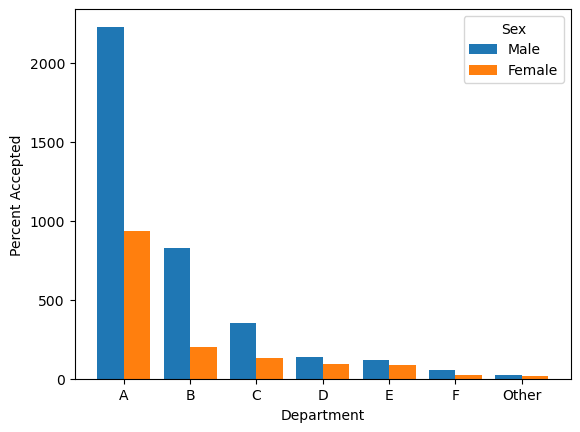

In [19]:
n = 1 # This is our first dataset 
t = 2 # Number of dataset
d = 7 # Number of sets of bars
w = 0.8 # Width of each bar

x_1 = [t*element + w*n for element in range(d)]

bar1 = plt.bar(x_1, male_accept)

n = 2  

x_2 = [t*element + w*n for element in range(d)]

bar2 = plt.bar(x_2, female_accept)

plt.xlabel('Department')
plt.ylabel('Percent Accepted')
plt.legend((bar1, bar2), ('Male', 'Female'), title = "Sex", loc="upper right")
ax = plt.subplot()
ax.set_xticks((np.array(x_1) + np.array(x_2))/2)

ax.set_xticklabels(colleges)
plt.show()

<AxesSubplot: xlabel='Major', ylabel='Admission'>

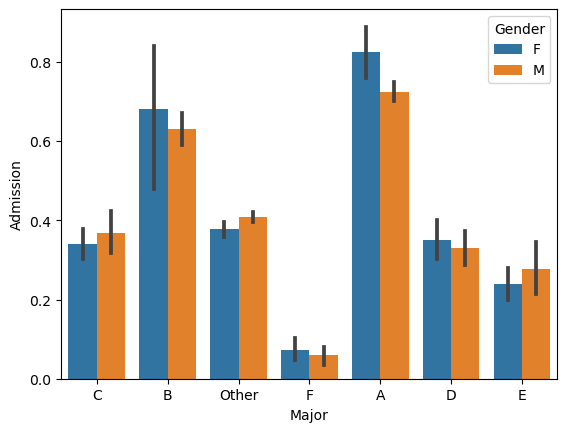

In [77]:
admission = berkeley.Admission == 'Accepted'
sex = berkeley.Gender
department = berkeley.Major
sns.barplot(x=department, y=admission, hue=sex)


In [ ]:
berkeley.Major.value_counts()

Other    7924
A        1246
C         918
D         792
F         714
B         585
E         584
Name: Major, dtype: int64

In [ ]:
# Contingency Tables: crosstab function from pandas
female_admission = pd.crosstab(female_accept, berkeley.Admission)
female_admission

Admission
Major


In [ ]:
# Contingency Tables: crosstab function from pandas
male_admission = pd.crosstab(male_accept, berkeley.Admission)
male_admission

Admission
Major


### Simpson's Paradox

https://youtu.be/4ePu1oHcoWs

In [ ]:
# Contingency Tables: crosstab function from pandas
# Investigate association between admission and major
admission_by_major = pd.crosstab(berkeley.Major, berkeley.Admission)
admission_by_major

Admission,Accepted,Rejected
Major,,
A,914,332
B,370,215
C,321,597
D,269,523
E,147,437
F,47,667
Other,3164,4760


In [ ]:
admission_by_major_prop = admission_by_major/len(berkeley.Admission)
admission_by_major_prop

Admission,Accepted,Rejected
Major,,
A,0.071613,0.026013
B,0.028990,0.016846
C,0.025151,0.046776
D,0.021077,0.040978
E,0.011518,0.034240
F,0.003683,0.052260
Other,0.247904,0.372953


In [ ]:
# Calculate all the marginal proportions from the table admission_by_major_prop
abmp_admission = admission_by_major_prop.sum(axis=0)
abmp_admission

Admission
Accepted    0.409935
Rejected    0.590065
dtype: float64

In [ ]:
abmp_major = admission_by_major_prop.sum(axis=1)
abmp_major

Major
A        0.097626
B        0.045836
C        0.071927
D        0.062054
E        0.045757
F        0.055943
Other    0.620857
dtype: float64

In [ ]:
# Investigate association between admission and major in women
admission_by_major_women = pd.crosstab(berkeley.Major, berkeley.Admission[berkeley.Gender == 'F'])
admission_by_major_women

Admission,Accepted,Rejected
Major,,
A,89,19
B,17,8
C,201,392
D,131,244
E,94,299
F,25,316
Other,937,1549


In [ ]:
admission_by_major_women_prop = pd.crosstab(berkeley.Major, berkeley.Admission[berkeley.Gender == 'F']) / len(berkeley.Admission)
admission_by_major_women_prop

Admission,Accepted,Rejected
Major,,
A,0.006973,0.001489
B,0.001332,0.000627
C,0.015749,0.030714
D,0.010264,0.019118
E,0.007365,0.023427
F,0.001959,0.024759
Other,0.073415,0.121366


In [ ]:
# Calculate all the marginal proportions from the table admission_by_major_women_prop
abmp_admission_w = admission_by_major_women_prop.sum(axis=0)
abmp_admission_w

Admission
Accepted    0.117057
Rejected    0.221500
dtype: float64

In [ ]:
abmp_major_w = admission_by_major_women_prop.sum(axis=1)
abmp_major_w

Major
A        0.008462
B        0.001959
C        0.046462
D        0.029382
E        0.030792
F        0.026718
Other    0.194782
dtype: float64

In [ ]:
# Contingency Tables: crosstab function from pandas
admission_by_major_men = pd.crosstab(berkeley.Major, berkeley.Admission[berkeley.Gender == 'M'])
admission_by_major_men

Admission,Accepted,Rejected
Major,,
A,825,313
B,353,207
C,120,205
D,138,279
E,53,138
F,22,351
Other,2227,3211


In [ ]:
admission_by_major_men_prop = pd.crosstab(berkeley.Major, berkeley.Admission[berkeley.Gender == 'M']) / len(berkeley.Admission)
admission_by_major_men_prop

Admission,Accepted,Rejected
Major,,
A,0.064640,0.024524
B,0.027658,0.016219
C,0.009402,0.016062
D,0.010813,0.021860
E,0.004153,0.010813
F,0.001724,0.027501
Other,0.174489,0.251587


In [ ]:
# Calculate all the marginal proportions from the table admission_by_major_men_prop
abmp_admission_m = admission_by_major_men_prop.sum(axis=0)
abmp_admission_m

Admission
Accepted    0.292878
Rejected    0.368565
dtype: float64

In [ ]:
# Calculate all the marginal proportions from the table admission_by_major_men_prop
abmp_major_m = admission_by_major_men_prop.sum(axis=1)
abmp_major_m

Major
A        0.089164
B        0.043877
C        0.025464
D        0.032673
E        0.014965
F        0.029225
Other    0.426075
dtype: float64